In [41]:
clear

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from scipy.fft import fft
import random
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [42]:
faultI10=scipy.io.loadmat('/content/Acquisition_un_1_10hz.mat')
faultI30=scipy.io.loadmat('/content/Acquisition_un_1_30hz.mat')
faultII10=scipy.io.loadmat('/content/Acquisition_un_2_10hz.mat')
faultII30=scipy.io.loadmat('/content/Acquisition_un_2_30hz.mat')
faultIII30=scipy.io.loadmat('/content/Acquisition_un_3_30hz.mat')
faultIII10=scipy.io.loadmat('/content/Acquisition_un_3_10hz.mat')
faultIV10=scipy.io.loadmat('/content/Acquisition_un_4_10hz.mat')
faultIV30=scipy.io.loadmat('/content/Acquisition_un_4_30hz.mat')
faultV10=scipy.io.loadmat('/content/Acquisition_un_5_10hz.mat')
faultV30=scipy.io.loadmat('/content/Acquisition_un_5_30hz.mat')





In [43]:
sigII30=faultII30['Acquisition_un_2_30hz']
sigII10=faultII10['Acquisition_un_2_10hz']
del faultII30,faultII10
sigI30=faultI30['Acquisition_un_1_30hz']
sigI10=faultI10['Acquisition_un_1_10hz']
del faultI30,faultI10
sigIII10=faultIII10['Acquisition_un_3_10hz']
sigIII30=faultIII30['Acquisition_un_3_30hz']
del faultIII10,faultIII30
sigIV10=faultIV10['Acquisition_un_4_10hz']
sigIV30=faultIV30['Acquisition_un_4_30hz']
del faultIV10,faultIV30
sigV10=faultV10['Acquisition_un_5_10hz']
sigV30=faultV30['Acquisition_un_5_30hz']
del faultV10,faultV30
# sigVI10=faultVI10['Acquisition_un_6_10hz']
# sigVI30=faultVI30['Acquisition_un_6_30hz']
# del faultVI10,faultVI30

In [44]:

def sliding_window(data, window_size, stride, training_size):
    """
    Applies a sliding window to the given data with the specified window size
    and stride length. Padding is added at the beginning and end of the data to
    ensure all samples are included in windows.
    """
    num_padding = window_size - stride
    data_padded = np.pad(data, ((num_padding, num_padding), (0, 0)), 'constant')
    window_data = []
    for i in range(0, len(data_padded) - window_size + 1, stride):
        window = data_padded[i:i+window_size, :]
        window_data.append(window)
    window_data = np.array(window_data)
    window_data = window_data[:training_size, :, :]
    window_data = np.transpose(window_data, (0, 2, 1))
    return window_data

In [45]:
windowsize=1500
stride=1400

In [46]:
sigtI10hz=sliding_window(sigI10,windowsize,stride,40000)[:,1:13,:]
sigtI30hz=sliding_window(sigI30,windowsize,stride,40000)[:,1:13,:]
sigtII10hz=sliding_window(sigII10,windowsize,stride,40000)[:,1:13,:]
sigtII30hz=sliding_window(sigII30,windowsize,stride,40000)[:,1:13,:]
del sigI10,sigI30,sigII10,sigII30
sigtIII30hz=sliding_window(sigIII30,windowsize,stride,40000)[:,1:13,:]
sigtIII10hz=sliding_window(sigIII10,windowsize,stride,40000)[:,1:13,:]
sigtIV30hz=sliding_window(sigIV30,windowsize,stride,40000)[:,1:13,:]
sigtIV10hz=sliding_window(sigIV10,windowsize,stride,40000)[:,1:13,:]
del sigIII30,sigIII10,sigIV30,sigIV10
sigtV30hz=sliding_window(sigV30,windowsize,stride,40000)[:,1:13,:]
sigtV10hz=sliding_window(sigV10,windowsize,stride,40000)[:,1:13,:]
# sigtVI30hz=sliding_window(sigVI30,windowsize,stride,40000)
# sigtVI10hz=sliding_window(sigVI10,windowsize,stride,40000)
# del sigV30,sigV10,sigVI30,sigVI10

In [47]:
datalable1=np.concatenate([sigtI10hz,sigtI30hz],axis=-1)

datalable2=np.concatenate([sigtII10hz,sigtII30hz],axis=-1)

datalable3=np.concatenate([sigtIII10hz,sigtIII30hz],axis=-1)

datalable4=np.concatenate([sigtIV10hz,sigtIV30hz],axis=-1)

datalabele5=np.concatenate([sigtV10hz,sigtV30hz],axis=-1)


In [48]:
#labels=np.concatenate((np.ones(np.shape(datalable1)[0]),np.zeros(np.shape(datalable1)[0]),np.ones(np.shape(datalable1)[0])*4,np.ones(np.shape(datalable1)[0])*2,np.ones(np.shape(datalable1)[0])*3),axis=0)
dataall=np.concatenate([datalable1,datalable2,datalable3,datalable4,datalabele5],axis=0)

In [49]:
np.shape(dataall)

(2150, 12, 3000)

In [50]:
import numpy as np
from scipy.signal import stft

# generate example signal with shape (7530, 12, 1000)
data = dataall

# set STFT parameters
window = 'hann'
nperseg = 256
noverlap = 128
fs = 10000

# compute STFT spectrogram for each channel
spectrograms = []
for i in range(data.shape[1]):
    _, _, spec = stft(data[:, i, :], fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
    spectrograms.append(np.abs(spec))

# stack spectrograms along the channel axis to get shape (7530, 12, num_freq_bins, num_time_bins)
spectrograms = np.stack(spectrograms, axis=1)





In [51]:
np.shape(spectrograms)

(2150, 12, 129, 25)

In [52]:
mean = np.mean(spectrograms, axis=(0, 1, 2, 3))
std = np.std(spectrograms, axis=(0, 1, 2, 3))
normalized_data = (spectrograms - mean) / std
data=normalized_data


In [31]:
np.shape(data)

(7530, 12, 129, 9)

In [53]:
labels=np.concatenate((np.ones(np.shape(datalable1)[0]),np.zeros(np.shape(datalable1)[0]),np.ones(np.shape(datalable1)[0])*4,np.ones(np.shape(datalable1)[0])*2,np.ones(np.shape(datalable1)[0])*3),axis=0)

In [14]:
# import numpy as np

# # Create an array of labels corresponding to each trial
# num_trials = 3350
# labels = np.zeros(num_trials)

# # Assign labels based on some criteria
# for i in range(num_trials):
#     # Determine the label based on some criteria of the STFT data
#     # For example, you could use the channel with the highest power, the frequency with the highest power,
#     # or some combination of both to determine the label.
#     # Here, we will use the channel with the highest power as an example.
#     max_channel = np.argmax(np.mean(np.abs(data[i]), axis=(1,2)))
#     if max_channel == 0: # class 1
#         labels[i] = 0
#     elif max_channel == 1: # class 2
#         labels[i] = 1
#     elif max_channel == 2: # class 3
#         labels[i] = 2
#     elif max_channel == 3: # class 4
#         labels[i] = 3
#     else: # class 5
#         labels[i] = 4



In [ ]:
labels[]

In [35]:
np.size(labels)

7530

In [54]:
indices = np.random.permutation(data.shape[0])

# Use the shuffled indices to shuffle both data and labels
shuffled_data = data[indices]
shuffled_labels = labels[indices]
data= shuffled_data
labels=shuffled_labels


In [55]:
from sklearn.model_selection import train_test_split

# Assume stft_data is your STFT results stored in a variable
# with shape (7530, 12, 129, 9)

# Generate labels for your data (assuming you have labels available)


# Split the data and labels into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")  # should be (6024, 12, 129, 9)
print(f"y_train shape: {y_train.shape}")  # should be (6024,)
print(f"x_test shape: {x_test.shape}")    # should be (1506, 12, 129, 9)
print(f"y_test shape: {y_test.shape}")    # should be (1506,)


x_train shape: (1720, 12, 129, 25)
y_train shape: (1720,)
x_test shape: (430, 12, 129, 25)
y_test shape: (430,)


(1506,)

In [57]:

import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, 129, 25)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)


  





   






Epoch 1/50
54/54 [==============================] - 14s 232ms/step - loss: 1.6429 - accuracy: 0.2169 - val_loss: 1.5932 - val_accuracy: 0.3163
Epoch 2/50
54/54 [==============================] - 10s 179ms/step - loss: 1.3340 - accuracy: 0.3890 - val_loss: 0.7139 - val_accuracy: 0.6907
Epoch 3/50
54/54 [==============================] - 10s 178ms/step - loss: 0.5530 - accuracy: 0.7756 - val_loss: 0.3424 - val_accuracy: 0.8930
Epoch 4/50
54/54 [==============================] - 8s 150ms/step - loss: 0.2910 - accuracy: 0.8855 - val_loss: 0.1885 - val_accuracy: 0.9302
Epoch 5/50
54/54 [==============================] - 10s 179ms/step - loss: 0.1866 - accuracy: 0.9331 - val_loss: 0.1006 - val_accuracy: 0.9651
Epoch 6/50
54/54 [==============================] - 10s 179ms/step - loss: 0.1324 - accuracy: 0.9529 - val_loss: 0.1101 - val_accuracy: 0.9605
Epoch 7/50
54/54 [==============================] - 8s 151ms/step - loss: 0.0830 - accuracy: 0.9738 - val_loss: 0.0744 - val_accuracy: 0.9698
E

KeyboardInterrupt: ignored

In [58]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy
print('Test accuracy:', test_acc)
y_pred = model.predict(x_test)

# Print the first 10 predictions
print(y_pred[:10])

14/14 - 1s - loss: 0.0130 - accuracy: 0.9930 - 538ms/epoch - 38ms/step
Test accuracy: 0.9930232763290405
14/14 [==============================] - 1s 37ms/step
[[9.9994999e-01 1.3619103e-05 3.6444047e-12 6.5886642e-19 3.6299534e-05]
 [9.9999994e-01 1.7155104e-08 3.3919739e-16 1.4275995e-24 5.2133462e-08]
 [1.1131997e-23 2.0661065e-15 3.4592302e-09 9.9999994e-01 1.0639809e-11]
 [2.2646314e-10 1.1803462e-11 2.9516045e-09 5.5964222e-12 9.9999994e-01]
 [9.9999529e-01 1.6345666e-06 2.3907846e-18 5.0136411e-23 3.0338913e-06]
 [2.7295671e-02 9.6205646e-01 3.2013570e-08 3.4733643e-15 1.0647876e-02]
 [6.8882457e-08 8.0049728e-10 2.2812608e-06 8.5854779e-10 9.9999756e-01]
 [8.7670625e-05 9.9991232e-01 2.6901293e-16 2.0228439e-18 1.7496465e-08]
 [1.2054541e-05 9.9994248e-01 1.1692949e-10 2.1351861e-12 4.5374640e-05]
 [8.3988518e-11 9.5977288e-09 1.2411073e-07 2.5312370e-06 9.9999732e-01]]


In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [42]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [44]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


ValueError: ignored

TypeError: ignored

ValueError: ignored

In [19]:
from sklearn.model_selection import train_test_split

# Assume data is your STFT results stored in a variable
# with shape (7530, 12, 129, 9)

# Reshape the data to have a 1D input shape
data_1d = data.reshape(data.shape[0], -1)

# Generate labels for your data
labels = ...

# Split the data and labels into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_1d, labels, test_size=0.2, random_state=42)


TypeError: ignored

In [18]:
np.shape(data_1d)

(7530, 13932)

In [101]:
np.shape(x_train)

(6024, 12, 1161)

In [103]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the model architecture
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(12, 1161)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
import numpy as np



# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


NameError: ignored

In [ ]:
import numpy as np

# Assuming you have 3 classes (0, 1, 2, 3, 4)
num_classes = 5

# Generate random labels for your STFT data
labelss = np.random.randint(0, num_classes, size=(7530,))
labelss

array([0, 2, 4, ..., 2, 4, 4])

In [ ]:
import numpy as np

# Assuming you have 3 classes (0, 1, 2, 3, 4)
num_classes = 5

# Generate random labels for your STFT data
labelss = np.random.randint(0, num_classes, size=(7530,))
labelss

array([0, 2, 4, ..., 2, 4, 4])

In [ ]:
import numpy as np

# Assuming you have 3 classes (0, 1, 2, 3, 4)
num_classes = 5

# Generate random labels for your STFT data
labelss = np.random.randint(0, num_classes, size=(7530,))
labelss

array([0, 2, 4, ..., 2, 4, 4])

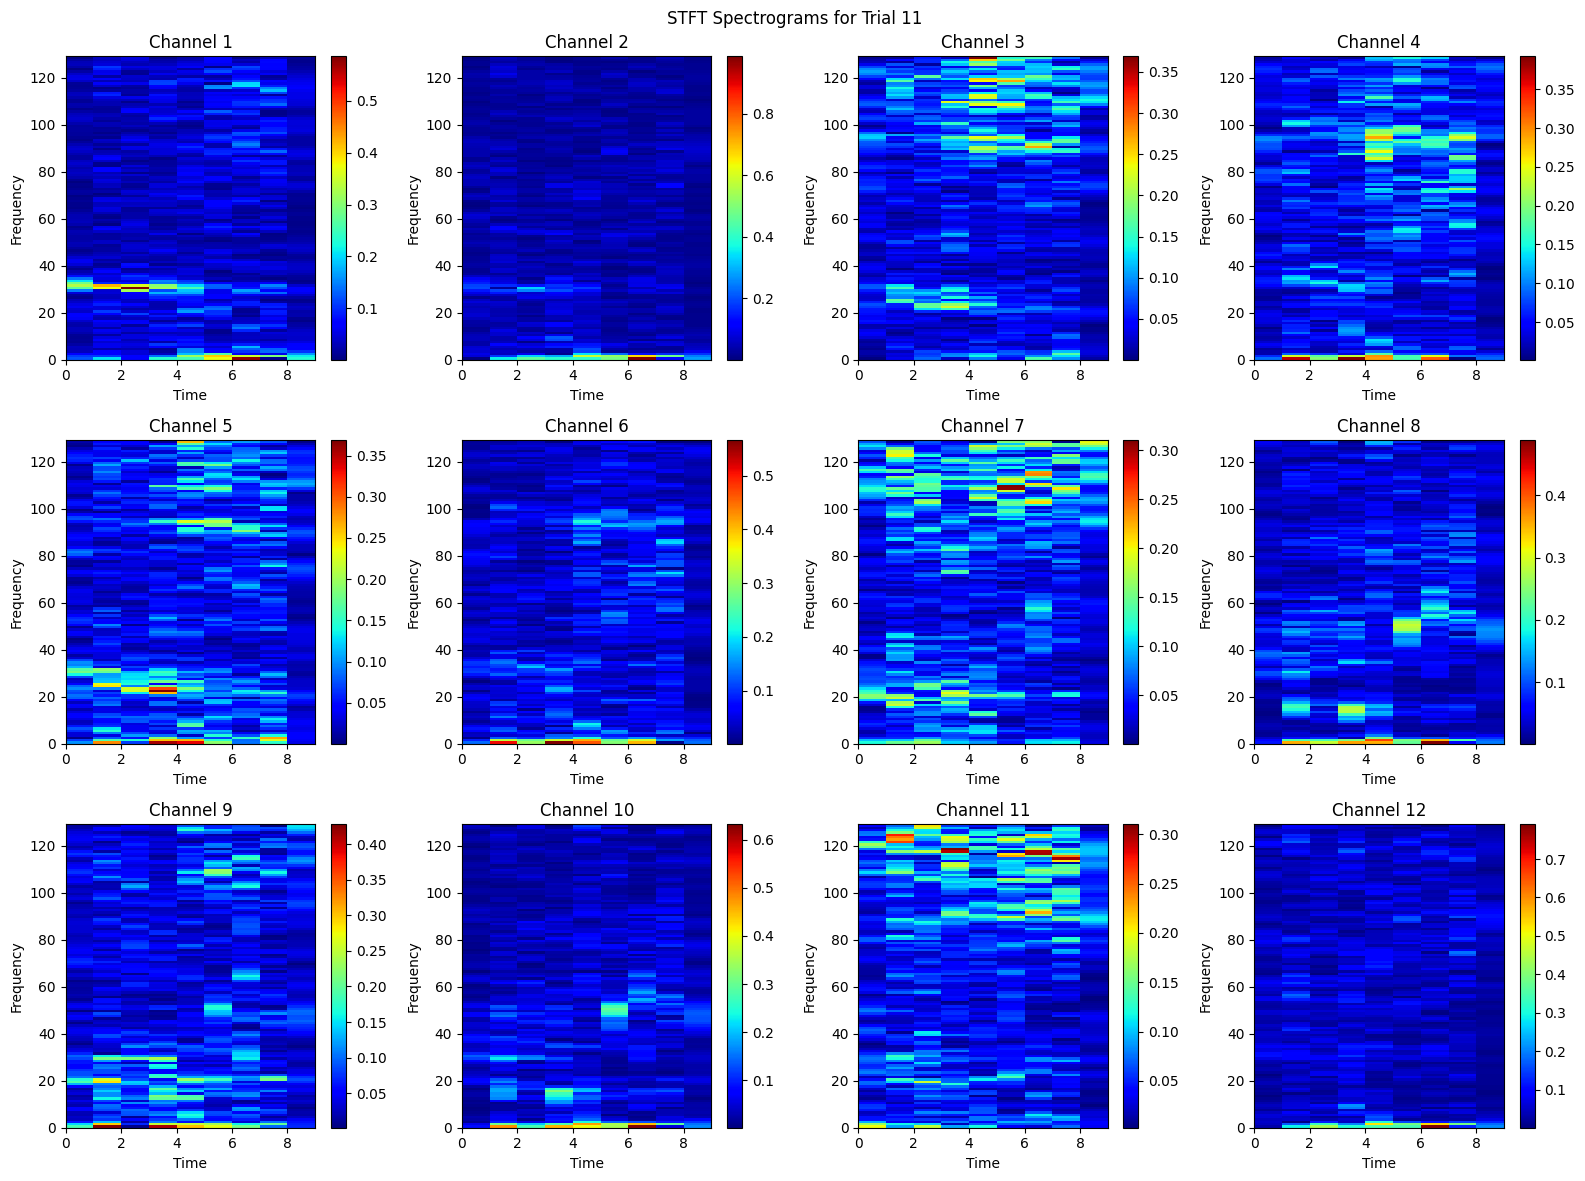

In [116]:
import matplotlib.pyplot as plt

# Select a trial to visualize
trial_num = 10

# Get the STFT spectrograms for all channels of the selected trial
trial_stft = spectrograms[trial_num]

# Set up the plot grid
num_channels = trial_stft.shape[0]
num_cols = 4
num_rows = (num_channels + num_cols - 1) // num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, num_rows*4))

# Plot each spectrogram
for i, ax in enumerate(axs.flatten()):
    if i < num_channels:
        spec = trial_stft[i]
        img = ax.pcolormesh(spec, cmap='jet')
        ax.set_title(f'Channel {i+1}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Frequency')
        fig.colorbar(img, ax=ax)

# Set overall title and spacing
fig.suptitle(f'STFT Spectrograms for Trial {trial_num+1}')
fig.tight_layout()
plt.show()




In [17]:
import numpy as np

# Assuming you have 3 classes (0, 1, 2, 3, 4)
num_classes = 5

# Generate random labels for your STFT data
labelss = np.random.randint(0, num_classes, size=(7530,))
labelss

array([0, 2, 4, ..., 2, 4, 4])

In [18]:
from sklearn.model_selection import train_test_split

# Define your STFT data
X = spectrograms

# Define your labels
y = labelss

# Split your data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [21]:
np.shape(X_train)

(4819, 12, 129, 9)

In [22]:
#new
indices = np.random.permutation(dataall.shape[0])

# Use the shuffled indices to shuffle both data and labels
shuffled_data = dataall[indices]
shuffled_labels = labels[indices]

NameError: ignored

In [23]:
import numpy as np
spec_data= spectrograms[:,:] 
# assume your spectrogram data is stored in variable called 'spec_data'
num_samples = spec_data.shape[0]  # number of samples
num_channels = spec_data.shape[1]  # number of channels
num_freq_bins = spec_data.shape[2]  # number of frequency bins
num_time_windows = spec_data.shape[3]  # number of time windows

# create labels for your data (replace with your own labels)
labels = np.random.randint(low=0, high=5, size=num_samples)

# split data into training, validation, and testing sets (60-20-20 split)
train_split = 0.6
val_split = 0.2

# calculate number of samples for each set
num_train_samples = int(train_split * num_samples)
num_val_samples = int(val_split * num_samples)
num_test_samples = num_samples - num_train_samples - num_val_samples

# shuffle indices of samples
shuffled_indices = np.random.permutation(num_samples)

# split indices into training, validation, and testing sets
train_indices = shuffled_indices[:num_train_samples]
val_indices = shuffled_indices[num_train_samples:num_train_samples+num_val_samples]
test_indices = shuffled_indices[num_train_samples+num_val_samples:]

# create empty arrays to store the split data and labels
train_data = np.zeros((num_train_samples, num_channels, num_freq_bins, num_time_windows))
val_data = np.zeros((num_val_samples, num_channels, num_freq_bins, num_time_windows))
test_data = np.zeros((num_test_samples, num_channels, num_freq_bins, num_time_windows))
train_labels = np.zeros(num_train_samples)
val_labels = np.zeros(num_val_samples)
test_labels = np.zeros(num_test_samples)

# copy data and labels into the split arrays
train_data[:] = spec_data[train_indices]
val_data[:] = spec_data[val_indices]
test_data[:] = spec_data[test_indices]
train_labels[:] = labels[train_indices]
val_labels[:] = labels[val_indices]
test_labels[:] = labels[test_indices]


In [39]:
np.shape(train_data)

(4518, 129, 108)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np



# Encode the labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Convert the labels to categorical format
train_labels_categorical = to_categorical(train_labels_encoded)
val_labels_categorical = to_categorical(val_labels_encoded)
test_labels_categorical = to_categorical(test_labels_encoded)

# Reshape the data for 1D CNN
train_data_1d = train_data.reshape(train_data.shape[0], train_data.shape[1]*train_data.shape[2])
val_data_1d = val_data.reshape(val_data.shape[0], val_data.shape[1]*val_data.shape[2])
test_data_1d = test_data.reshape(test_data.shape[0], test_data.shape[1]*test_data.shape[2])

# Build the 1D CNN model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(train_labels_categorical.shape[1], activation='softmax'))

# Compile the model



In [43]:
np.shape(train_data_1d)

(4518, 13932)

In [44]:
np.shape(train_labels_categorical,)

(4518, 5)

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=10, batch_size=32)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_data, test_labels_categorical)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)




Epoch 1/10


ValueError: ignored

In [34]:
import numpy as np

# Assuming your input data is stored in variables x_train, y_train, x_val, y_val, x_test, y_test

# Reshape the data to have the expected shape
x_train = np.reshape(train_data, (train_data.shape[0], 129, 36))
x_val = np.reshape(val_data, (val_data.shape[0], 129, 36))
x_test = np.reshape(test_data, (test_data.shape[0], 129, 36))

# Create the sequential model and add layers
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(129, 36)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


ValueError: ignored

In [168]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(129, 9)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

# evaluate the model on test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10


ValueError: ignored

In [117]:
indices = np.random.permutation(dataall.shape[0])

# Use the shuffled indices to shuffle both data and labels
shuffled_data = dataall[indices]
shuffled_labels = labels[indices]

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split

def split_data_equally(X, y, test_size=0.4, random_state=None):
    # Get unique labels in y and their indices
    labels, indices = np.unique(y, return_index=True)
    n_labels = len(labels)
    
    # Split each label's indices into test and train
    train_indices = []
    test_indices = []
    for i in range(n_labels):
        label_indices = np.where(y == labels[i])[0]
        label_train_indices, label_test_indices = train_test_split(label_indices, test_size=test_size, 
                                                                    random_state=random_state)
        train_indices += list(label_train_indices)
        test_indices += list(label_test_indices)
    
    # Shuffle train and test indices
    np.random.shuffle(train_indices)
    np.random.shuffle(test_indices)
    
    # Get corresponding data and labels
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [67]:
X_train, X_test, y_train, y_test = split_data_equally(shuffled_data,shuffled_labels,test_size=0.3 )